<a href="https://colab.research.google.com/github/almeida-cma/TI_TEMA01/blob/main/TI_T1_Cap_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Áudio carregado: Gravando_3.wav
🔊 Eventos sonoros detectados: 9


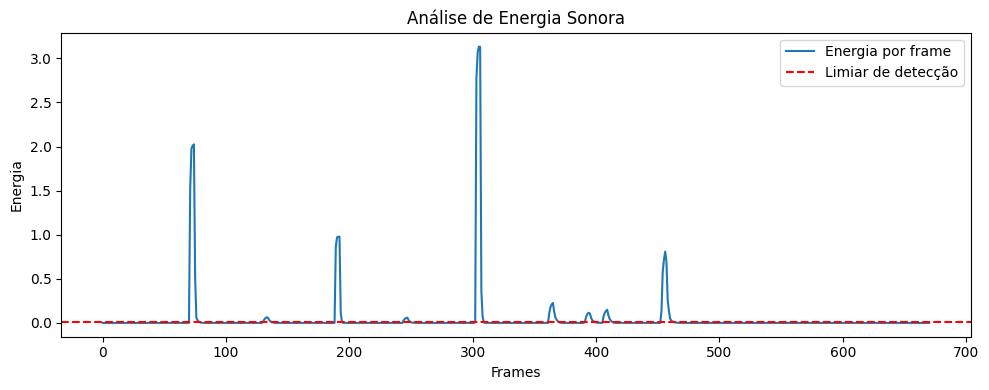

In [ ]:
#@title 📤 Upload de Áudio e Contagem de Eventos Sonoros
from google.colab import files
from IPython.display import Audio, clear_output
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Upload do arquivo .wav
uploaded = files.upload()
filename = next(iter(uploaded))  # Nome do primeiro arquivo enviado

# Mostra player
clear_output()
display(Audio(filename))
print(f"📂 Áudio carregado: {filename}")

# Carrega áudio
y, sr = librosa.load(filename, sr=None)

# Calcula energia por frame
frame_length = 2048
hop_length = 512
energy = np.array([
    sum(abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])

# Detecta eventos sonoros por limiar
threshold = np.percentile(energy, 90)  # picos acima dos 10% mais altos
events = np.where(energy > threshold)[0]
unique_events = np.diff(events) > 2
event_count = np.count_nonzero(unique_events) + 1 if len(events) > 0 else 0

# Resultado
print(f"🔊 Eventos sonoros detectados: {event_count}")

# Gráfico
plt.figure(figsize=(10, 4))
plt.plot(energy, label='Energia por frame')
plt.axhline(threshold, color='red', linestyle='--', label='Limiar de detecção')
plt.title('Análise de Energia Sonora')
plt.xlabel('Frames')
plt.ylabel('Energia')
plt.legend()
plt.tight_layout()
plt.show()
